**<h1>Preprocesamiento</h1>**

**1.- Filtrar y guardar los índices:**


Filtrar los índices si en caso no hayan sido filtrados, caso contrario cargarlos

In [5]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image, ImageDraw
import cv2
import os
import json

In [8]:
# Definir la ruta local donde se guardarán los datos y los índices filtrados
root = '/home/russell/git/CountPeople/voc_dataset'  # Cambia esta ruta a la ubicación donde deseas guardar los datos

# Verificar si el dataset ya existe
train_dir = os.path.join(root, 'VOCdevkit', 'VOC2012', 'JPEGImages')
val_dir = os.path.join(root, 'VOCdevkit', 'VOC2012', 'JPEGImages')

print(train_dir)
print(val_dir)

/home/russell/git/CountPeople/voc_dataset/VOCdevkit/VOC2012/JPEGImages
/home/russell/git/CountPeople/voc_dataset/VOCdevkit/VOC2012/JPEGImages


In [9]:
# Descargar y preparar el dataset Pascal VOC 2012 si no existe
if not os.path.exists(train_dir):
    dataset_train = torchvision.datasets.VOCDetection(root=root, year='2012', image_set='train', download=True)
    print("no existe train_dir")
else:
    dataset_train = torchvision.datasets.VOCDetection(root=root, year='2012', image_set='train', download=False)
    print("existe train_dir")

if not os.path.exists(val_dir):
    dataset_val = torchvision.datasets.VOCDetection(root=root, year='2012', image_set='val', download=True)
    print("no existe val_dir")
else:
    dataset_val = torchvision.datasets.VOCDetection(root=root, year='2012', image_set='val', download=False)
    print("existe val_dir")

# Ver un ejemplo de datos
img, target = dataset_train[0]
print("Imagen:", img)
print("Anotaciones:", target)

existe train_dir
existe val_dir
Imagen: <PIL.Image.Image image mode=RGB size=500x442 at 0x7E4561EA0970>
Anotaciones: {'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}}


In [10]:
print(dataset_train)
print(dataset_val)

Dataset VOCDetection
    Number of datapoints: 5717
    Root location: /home/russell/git/CountPeople/voc_dataset
Dataset VOCDetection
    Number of datapoints: 5823
    Root location: /home/russell/git/CountPeople/voc_dataset


In [11]:
# Filtrar los índices y guardarlos
def filter_indices(dataset, class_name="person"):
    indices = []
    for idx in range(len(dataset)):
        # print(idx)
        img, target = dataset[idx]
        if any(obj['name'] == class_name for obj in target['annotation']['object']):
            indices.append(idx)
    print(f"Number of images containing '{class_name}':", len(indices))
    return indices

In [12]:
# Verificar y cargar los índices filtrados para entrenamiento
train_indices_path = os.path.join(root, 'filtered_train_indices.json')
if os.path.exists(train_indices_path):
    print("train_indices_path existe")
    with open(train_indices_path, 'r') as f:
        filtered_train_indices = json.load(f)
else:
    print("train_indices_path no existe")
    filtered_train_indices = filter_indices(dataset_train)
    with open(train_indices_path, 'w') as f:
        json.dump(filtered_train_indices, f)

# # Verificar y cargar los índices filtrados para validación
val_indices_path = os.path.join(root, 'filtered_val_indices.json')
if os.path.exists(val_indices_path):
    print("val_indices_path existe")
    with open(val_indices_path, 'r') as f:
        filtered_val_indices = json.load(f)
else:
    print("val_indices_path no existe")
    filtered_val_indices = filter_indices(dataset_val)
    with open(val_indices_path, 'w') as f:
        json.dump(filtered_val_indices, f)

train_indices_path existe
val_indices_path existe


In [13]:
print(filtered_train_indices)
print(len(filtered_train_indices))

[0, 3, 6, 8, 19, 24, 26, 28, 29, 30, 31, 32, 37, 39, 42, 43, 45, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 61, 63, 65, 66, 67, 69, 70, 72, 74, 75, 76, 77, 79, 82, 83, 84, 85, 90, 91, 92, 93, 94, 95, 100, 101, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 119, 122, 124, 128, 130, 131, 132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 144, 146, 148, 149, 150, 153, 154, 156, 157, 158, 159, 160, 162, 163, 166, 167, 168, 171, 174, 176, 178, 179, 180, 181, 182, 183, 185, 188, 189, 190, 191, 193, 195, 197, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 210, 213, 214, 215, 216, 217, 219, 220, 222, 224, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 256, 257, 258, 260, 262, 263, 264, 265, 267, 268, 269, 271, 274, 277, 278, 283, 284, 285, 286, 287, 288, 289, 291, 293, 294, 295, 296, 297, 299, 300, 302, 304, 306, 307, 308, 309, 310, 311, 312, 313, 316, 317, 319, 320, 321, 322, 323, 324, 325, 327, 328, 330, 332,

In [9]:
print(filtered_val_indices)
print(len(filtered_val_indices))

[1, 6, 8, 9, 13, 14, 17, 20, 26, 28, 32, 37, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 61, 64, 66, 67, 68, 69, 70, 73, 74, 75, 76, 80, 81, 82, 84, 86, 88, 89, 91, 93, 94, 95, 97, 99, 100, 101, 102, 103, 105, 107, 108, 109, 110, 115, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 133, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 194, 197, 198, 199, 202, 203, 205, 206, 207, 208, 209, 216, 217, 219, 220, 222, 224, 225, 227, 228, 230, 232, 233, 234, 235, 237, 239, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 261, 262, 263, 265, 266, 267, 269, 270, 271, 274, 275, 276, 277, 278, 279, 281, 282, 284, 285, 288, 289, 290, 292, 295, 296, 298, 299, 300, 302, 304, 305, 309, 310, 311, 312, 313, 315, 316, 317, 318, 319, 323, 324, 325, 326, 328, 329, 330, 331, 

**2.- Transformaciones y Preparación del Dataset**

Transformacion y implementacion del nuevo dataset con los indices filtrados

In [10]:
# Transformaciones y Preparación del Dataset
from torchvision.transforms import functional as F

def transform(img, target):
    img = F.to_tensor(img)
    return img, target

class FilteredVOCDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, indices, transforms=None):
        self.dataset = dataset
        self.indices = indices
        self.transforms = transforms

    def __getitem__(self, idx):
        actual_idx = self.indices[idx]
        img, target = self.dataset[actual_idx]

        boxes = []
        labels = []
        for obj in target['annotation']['object']:
            if obj['name'] != "person":
                continue
            bbox = obj['bndbox']
            xmin = int(bbox['xmin'])
            ymin = int(bbox['ymin'])
            xmax = int(bbox['xmax'])
            ymax = int(bbox['ymax'])
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(1)  # 1 para persona

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        image_id = torch.tensor([idx])

        if len(boxes) == 0:
            area = torch.tensor([0], dtype=torch.float32)  # If empty, set area to 0
        else:
            area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)

        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = image_id
        target['area'] = area
        target['iscrowd'] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.indices)

In [11]:
# Crear los conjuntos de datos filtrados
voc_dataset_train = FilteredVOCDataset(dataset_train, filtered_train_indices, transforms=transform)
voc_dataset_val = FilteredVOCDataset(dataset_val, filtered_val_indices, transforms=transform)

In [12]:
print(len(voc_dataset_train))
print(len(voc_dataset_val))

2142
2232


In [13]:
# Dividir los datos en lotes
data_loader_train = torch.utils.data.DataLoader(voc_dataset_train, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
data_loader_val = torch.utils.data.DataLoader(voc_dataset_val, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Ver un ejemplo de datos
img, target = voc_dataset_train[0]
print(len(data_loader_train))
print(len(data_loader_val))

1071
1116


> Estimar el número de iteraciones por época

In [14]:
# Estimar el numero de iteraciones por epoca
batch_size = 2
num_train_samples = len(voc_dataset_train)
num_iterations_per_epoch = num_train_samples // batch_size
if num_train_samples % batch_size != 0:
    num_iterations_per_epoch += 1  # Considerar la última iteración si hay un lote incompleto
print(f'Número de iteraciones por época: {num_iterations_per_epoch}')

Número de iteraciones por época: 1071


**3.- Definición del modelo**


In [5]:
# Definición del Modelo
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model


/home/russell/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/russell/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [6]:
in_features = model.roi_heads.box_predictor.cls_score.in_features
num_classes = 2  # 1 clase (persona) + fondo
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)









device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
print("device: ", device)

device:  cuda


In [7]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

**4.- Entrenamiento**

In [41]:
# Entrenamiento
import time
import json

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
num_epochs = 10



# Inicializa una lista para almacenar las pérdidas por época
epoch_losses = []

for epoch in range(num_epochs):
    start_epoch_time = time.time()

    model.train()
    i = 0
    start_train_time = time.time()
    epoch_loss = 0
    for images, targets in data_loader_train:
        batch_start_time = time.time()
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        if any(t['boxes'].numel() == 0 for t in targets):
            continue # Skip this batch if any target boxes tensor is empty
        loss_dict = model(images, targets)
        # print(type(loss_dict))
        # print("loss_dict ", loss_dict)
        # print("loss_dict.values(): ", loss_dict.values())
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        epoch_loss += losses.item()
        batch_end_time = time.time()
        if i % 10 == 0:
            print(f'Epoch {epoch}, Iteration {i}, Loss: {losses.item()}, Batch Time: {batch_end_time - batch_start_time:.2f}s')
        i += 1

    # Al finalizar la época, calcula el promedio de la pérdida y guarda en la lista
    avg_epoch_loss = epoch_loss / len(data_loader_train)
    epoch_losses.append(avg_epoch_loss)

    end_train_time = time.time()
    print(f'Epoch {epoch}, Training Time: {end_train_time - start_train_time:.2f}s')
    lr_scheduler.step()

    # Evaluar el modelo
    # model.eval()
    # validation_loss = 0
    # start_val_time = time.time()
    # i = 0
    # with torch.no_grad():
    #     for images, targets in data_loader_val:
    #         batch_start_time = time.time()
    #         images = list(image.to(device) for image in images)
    #         targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    #         # Check if any target boxes tensor is empty
    #         if any(t['boxes'].numel() == 0 for t in targets):
    #             continue # Skip this batch if any target boxes tensor is empty

    #         # with torch.no_grad():
    #             losses_dict = model(images, targets)


    #         # loss_dict = model(images, targets)
    #         # print("type: ", type(loss_dict))
    #         # print("loss_dict: ",loss_dict)
    #         # if isinstance(loss_dict, dict):  # Asegúrate de que loss_dict sea un diccionario
    #         #     print(type(loss_dict))
    #         losses = sum(loss for loss in loss_dict.values())
    #         validation_loss += losses.item()

    #         batch_end_time = time.time()
    #         if(i % 10 == 0) :
    #             print(f'Epoch {epoch}, Iteration {i}, Validation Batch Time: {batch_end_time - batch_start_time:.2f}s')
    #             print(f'Epoch {epoch}, Iteration {i}, Loss: {losses.item()}, Batch Time: {batch_end_time - batch_start_time:.2f}s')

    #         i += 1
    # end_val_time = time.time()
    # print(f'Validation Time: {end_val_time - start_val_time:.2f}s')



    end_epoch_time = time.time()
    print(f'Epoch {epoch} Total Time: {end_epoch_time - start_epoch_time:.2f}s')
    # print(f'Epoch {epoch}, Validation Loss: {validation_loss / len(data_loader_val)}')

# Guardar las pérdidas en un archivo JSON
with open('epoch_losses.json', 'w') as f:
    json.dump({'epoch_losses': epoch_losses}, f)
print("Pérdidas por época guardadas en 'epoch_losses.json'")


Epoch 0, Iteration 0, Loss: 0.8744369745254517, Batch Time: 2.56s
Epoch 0, Iteration 10, Loss: 0.22603897750377655, Batch Time: 0.61s
Epoch 0, Iteration 20, Loss: 0.20339423418045044, Batch Time: 0.74s
Epoch 0, Iteration 30, Loss: 0.21907736361026764, Batch Time: 0.62s
Epoch 0, Iteration 40, Loss: 0.19232214987277985, Batch Time: 0.57s
Epoch 0, Iteration 50, Loss: 0.1909106969833374, Batch Time: 0.58s
Epoch 0, Iteration 60, Loss: 0.4017576277256012, Batch Time: 0.58s
Epoch 0, Iteration 70, Loss: 0.685338020324707, Batch Time: 0.58s
Epoch 0, Iteration 80, Loss: 0.2779795527458191, Batch Time: 0.59s
Epoch 0, Iteration 90, Loss: 0.24045085906982422, Batch Time: 0.64s
Epoch 0, Iteration 100, Loss: 0.13781124353408813, Batch Time: 0.78s
Epoch 0, Iteration 110, Loss: 0.1438683122396469, Batch Time: 0.76s
Epoch 0, Iteration 120, Loss: 0.10763566941022873, Batch Time: 0.85s
Epoch 0, Iteration 130, Loss: 0.2579943835735321, Batch Time: 0.59s
Epoch 0, Iteration 140, Loss: 0.3301849067211151, Bat

**4.1 Graficas las perdidas**

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.25896020976254364, 0.21134217119628754, 0.18459170988224358, 0.1361849840059111, 0.12216795692229027, 0.11483429055782704, 0.10749938720915497, 0.10625662194455371, 0.10598447518710162, 0.10489147920491927]


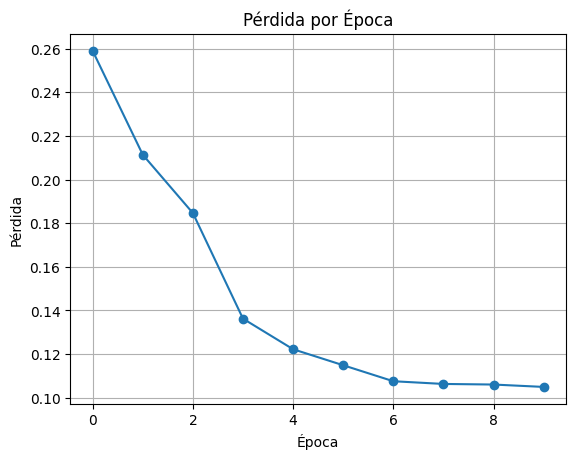

In [3]:
import matplotlib.pyplot as plt
import json

# Cargar las pérdidas desde el archivo JSON
with open('epoch_losses.json', 'r') as f:
    data = json.load(f)
    epoch_losses = data['epoch_losses']

# Graficar
epochs = list(range(len(epoch_losses)))
print(epochs)
print(epoch_losses)
plt.plot(epochs, epoch_losses, marker='o')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida por Época')
plt.grid(True)
plt.show()

**5.- Guardamos el modelo entrenado**

In [43]:
# Obtener el directorio de trabajo actual
current_dir = os.getcwd()
print("Current directory:", current_dir)

# Guardar el modelo
torch.save(model.state_dict(), os.path.join(current_dir, 'fasterrcnn_person_detector_10_epochs.pth'))

Current directory: /home/russell/git/CountPeople
